# Video Translation

## Connect to EvaDB

In [1]:
%pip install --quiet "evadb[document,notebook]"
import evadb
cursor = evadb.connect().cursor()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.7/578.7 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.6/137.6 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.7/111.7 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.6/92.6 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.4/139.4 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 802.4/802.4 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.3/222.3 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 24.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup

Downloading: "http://ml.cs.tsinghua.edu.cn/~chenxi/pytorch-models/mnist-b07bb66b.pth" to /root/.cache/torch/hub/checkpoints/mnist-b07bb66b.pth
100%|██████████| 1.03M/1.03M [00:01<00:00, 970kB/s]
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth


## Download Video

In [7]:
!wget -nc "https://www.dropbox.com/scl/fi/9ht5zra5tvua2x79fxy0j/Group-Discussion-20210609_043048-Meeting-Recording.mp4?rlkey=s7tzz5xlfez4gnpqny3ncfx51&dl=0" -O video.mp4

--2024-01-18 16:41:50--  https://www.dropbox.com/scl/fi/9ht5zra5tvua2x79fxy0j/Group-Discussion-20210609_043048-Meeting-Recording.mp4?rlkey=s7tzz5xlfez4gnpqny3ncfx51&dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6017:18::a27d:212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://ucc527a800719e2bebad27ad2ef4.dl.dropboxusercontent.com/cd/0/inline/CLneoSGUuCXj_clZW81SKGhzPZsVY1RlFb-HdMtPIdr-v86CIW23tEU3Un1QNXMQrXynqtdEheCoOPSvuPOw145R4Q9KEtQRVua-pMsoLF4RZ6WdEG69fUo_r4zVgTmEbNJgyNHHJlkN4f_5ZKfDAJfa/file# [following]
--2024-01-18 16:41:51--  https://ucc527a800719e2bebad27ad2ef4.dl.dropboxusercontent.com/cd/0/inline/CLneoSGUuCXj_clZW81SKGhzPZsVY1RlFb-HdMtPIdr-v86CIW23tEU3Un1QNXMQrXynqtdEheCoOPSvuPOw145R4Q9KEtQRVua-pMsoLF4RZ6WdEG69fUo_r4zVgTmEbNJgyNHHJlkN4f_5ZKfDAJfa/file
Resolving ucc527a800719e2bebad27ad2ef4.dl.dropboxusercontent.com (ucc527a800719e2bebad27ad2ef4.d

## Visualize Video Frame

In [8]:
import cv2
from matplotlib import pyplot as plt

def show_video_frame(input_video_path, show_frame_number = 100):
    vcap = cv2.VideoCapture(input_video_path)
    vcap.set(1, show_frame_number)
    ret, frame = vcap.read()
    frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)
    plt.imshow(frame)
    plt.show()
    vcap.release()

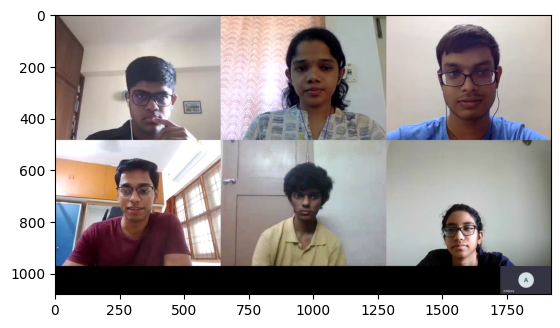

In [9]:
show_video_frame('video.mp4')

In [10]:
! pip install eva-decord

In [11]:
# Load the video
cursor.query("DROP TABLE IF EXISTS VIDEOS").df()
cursor.query("LOAD VIDEO 'video.mp4' INTO VIDEOS").df()

,0
0,Number of loaded VIDEO: 1


## Speech Recognition From Video

In [12]:
# Drop the Text Summarization UDF if needed
cursor.query("DROP FUNCTION IF EXISTS SpeechRecognizer;").df()

# Create a Text Summarization UDF using Hugging Face
text_summarizer_udf_creation = """
    CREATE FUNCTION SpeechRecognizer
    TYPE HuggingFace
    TASK 'automatic-speech-recognition'
    MODEL 'openai/whisper-base';
"""
cursor.query(text_summarizer_udf_creation).df()

01-18-2024 16:42:42 WARNING[drop_object_executor:drop_object_executor.py:_handle_drop_function:0089] Function SpeechRecognizer does not exist, therefore cannot be dropped.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.98k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/290M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/3.78k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/805 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/836k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.48M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/494k [00:00<?, ?B/s]

normalizer.json:   0%|          | 0.00/52.7k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/34.6k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.08k [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


preprocessor_config.json:   0%|          | 0.00/185k [00:00<?, ?B/s]

,0
0,Function SpeechRecognizer added to the database.


## Text Translation

In [13]:
# Drop the Text Translation UDF if needed
cursor.query("DROP FUNCTION IF EXISTS TextTranslator;").df()

# Create a Text Translation UDF using Hugging Face
text_translation_udf_creation = """
    CREATE FUNCTION TextTranslator
    TYPE HuggingFace
    TASK 'text2text-generation'
    MODEL 'Helsinki-NLP/opus-mt-en-zh';
"""
cursor.query(text_translation_udf_creation).df()

01-18-2024 16:44:22 WARNING[drop_object_executor:drop_object_executor.py:_handle_drop_function:0089] Function TextTranslator does not exist, therefore cannot be dropped.


config.json:   0%|          | 0.00/1.40k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/312M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/44.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/806k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/805k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.62M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:197: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


,0
0,Function TextTranslator added to the database.


## Configure Pandas Display

In [14]:
import pandas as pd
pd.set_option('display.max_colwidth', None)

In [15]:
# Drop the table if needed
cursor.query("DROP TABLE IF EXISTS TEXT_SUMMARY;").df()


# Create a materialized view of the text summarization output
text_summarization_query = """
    CREATE TABLE
    TEXT_SUMMARY AS
    SELECT SpeechRecognizer(audio) FROM VIDEOS;
"""
cursor.query(text_summarization_query).df()

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


,0
0,The table TEXT_SUMMARY has been successfully created with 1 rows.


In [16]:
cursor.query("SELECT * FROM TEXT_SUMMARY;").df()

_row_id  \
0        1   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

## Translated Transcription of Video (Chinese)

In [22]:
# Drop the table if needed
cursor.query("DROP TABLE IF EXISTS TEXT_TRANSLATED;").df()


# Create a materialized view of the text summarization output
text_translation_query = """
    CREATE TABLE
    TEXT_TRANSLATED AS
    SELECT TextTranslator(text) FROM TEXT_SUMMARY;
"""
cursor.query(text_translation_query).df()

,0
0,The table TEXT_TRANSLATED has been successfully created with 1 rows.


In [23]:
cursor.query("SELECT * FROM TEXT_TRANSLATED;").df()

,_row_id,generated_text
0,1,"早上好,妈妈,早,早,早,早,早,早,早,早,早,早,早,早,早,早,早,早,早,早,早,早,早,早,早,早,早,早,早,早,早,早,早,早,早,早,早,早,早,早,早,早,早,早,早,早,早,早,早,早,早,早,早,早,早,早,早,早,早,早,早,早,早,早,早,早,早,早,早,早,早,早,早,早,早,早,早,早,早,早,早,早,早,早,早,早,早,早,早,早,早,早,早,早,早,早,早,早,早,早,早,早,早,早,早,早,早,早,早,早,早"
